# 2. Data Cleaning

In this notebook, we will cover the essential concepts and methods for cleaning data. We will start by defining missing data and outliers, followed by various techniques to handle them.

## Missing Data

### What is Missing Data?

- Missing data (missed data) are incomplete data, meaning that some variables are unknown.
- Examples:
  - A patient may be withdrawn from a clinical study if their condition is not well controlled, leading to a loss of data.
  - A data acquisition problem occurs during collection, so one or more variables cannot be measured.

Let's create a simple DataFrame with some missing values and explore the methods to detect them using `isnull()` and `isna()`.


In [6]:
import pandas as pd
import numpy as np

# Creating a sample DataFrame with missing values
data = {
    'Age': [25, 30, 35, 38, 40, 45, np.nan],
    'Salary': [50000, 60000, np.nan, 70000, 80000, np.nan, 90000],
    'Experience': [2, np.nan, np.nan, 5, np.nan, 10, 12]
}

df = pd.DataFrame(data)

df

,Age,Salary,Experience
0,25.0,50000.0,2.0
1,30.0,60000.0,NaN
2,35.0,NaN,NaN
3,38.0,70000.0,5.0
4,40.0,80000.0,NaN
5,45.0,NaN,10.0
6,NaN,90000.0,12.0


In [7]:
# Detecting missing values
missing_data = df.isnull()
print("\nMissing Data:\n", missing_data)


Missing Data:
      Age  Salary  Experience
0  False   False       False
1  False   False        True
2  False    True        True
3  False   False       False
4  False   False        True
5  False    True       False
6   True   False       False


In [8]:
missing_data_sum = df.isna().sum()
print("\nSum of Missing Data:\n", missing_data_sum)


Sum of Missing Data:
 Age           1
Salary        2
Experience    3
dtype: int64


## Handling Missing Data

- Missing data cannot be automatically processed in a single manner. Their treatment depends on their proportion relative to the entire dataset.
- The repair of a dataset containing missing data can take two main forms:
  - Removing the missing data = Deletion
  - Replacing the missing values with artificial values = Imputation

### Deletion of Missing Data

- Missing data are removed if their proportion in the dataset is small.
- This method allows us to consider only individuals who have no missing values in the selected variables for machine learning.
- Disadvantage: Loss of data samples, especially when the dataset is small.

Let's demonstrate this using the sample DataFrame.

In [9]:
# Deleting rows with missing values
df_dropped = df.dropna()
print("Data after deleting rows with missing values:\n", df_dropped)

Data after deleting rows with missing values:
     Age   Salary  Experience
0  25.0  50000.0         2.0
3  38.0  70000.0         5.0


### Imputation of Missing Data

- Imputation of missing data refers to replacing the missing values in the dataset with artificial values.
- Ideally, these replacements should not significantly alter the distribution and composition of the dataset.
- Approaches to imputation:
  - Imputation with a statistical value
  - Imputation using k-nearest neighbors
  - Iterative imputation

#### Imputation with a Statistical Value

- For quantitative data, missing data can be imputed with:
  - A constant value
  - The mean of the variable
  - The median of the variable
- For qualitative data, missing data can be imputed with the mode.

Let's demonstrate imputation using the mean and median.

In [10]:
# Imputation using the mean
df_mean_imputed = df.fillna(df.mean())
print("Data after mean imputation:\n", df_mean_imputed)

# Imputation using the median
df_median_imputed = df.fillna(df.median())
print("Data after median imputation:\n", df_median_imputed)


Data after mean imputation:
     Age   Salary  Experience
0  25.0  50000.0        2.00
1  30.0  60000.0        7.25
2  35.0  70000.0        7.25
3  38.0  70000.0        5.00
4  40.0  80000.0        7.25
5  45.0  70000.0       10.00
6  35.5  90000.0       12.00
Data after median imputation:
     Age   Salary  Experience
0  25.0  50000.0         2.0
1  30.0  60000.0         7.5
2  35.0  70000.0         7.5
3  38.0  70000.0         5.0
4  40.0  80000.0         7.5
5  45.0  70000.0        10.0
6  36.5  90000.0        12.0


## Outliers

### What are Outliers?

- Outliers are extreme values compared to the rest of the data to be analyzed.
- They are often caused by errors during data acquisition or transcription.
- However, in some cases, they may correspond to real but unusual observations.

### Methods for Detecting Outliers

- Graphical analysis
- Detection based on interquartile distance
- Detection based on standard deviation

#### Graphical Analysis

- In univariate analysis (x is a scalar), graphical methods such as scatter plots can detect outliers.
- A scatter plot is a cloud of points that represents one numerical variable as a function of another numerical variable: \(Y \sim X\)
- Each point represents an individual.
- The positions on the X (horizontal) and Y (vertical) axes represent the values of the two variables.

Let's demonstrate a scatter plot with outliers.

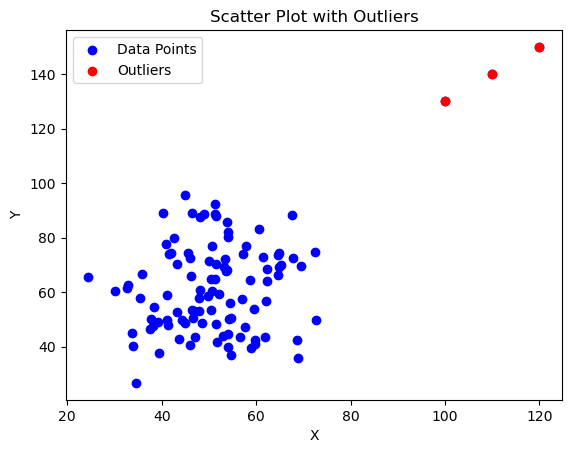

In [14]:
# Creating a scatter plot with outliers
import matplotlib.pyplot as plt

# Generating sample data with outliers
np.random.seed(0)
X = np.random.normal(50, 10, 100)
Y = np.random.normal(60, 15, 100)
# Adding outliers
X = np.append(X, [100, 110, 120])
Y = np.append(Y, [130, 140, 150])

# Identifying outliers
outliers_X = X[X > 80]
outliers_Y = Y[Y > 100]

# Creating scatter plot
plt.scatter(X, Y, color='blue', label='Data Points')
plt.scatter(outliers_X, outliers_Y, color='red', label='Outliers')
plt.title('Scatter Plot with Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


#### Detection Based on Interquartile Distance

According to the classic definition of a box plot, a point is displayed as an outlier if:

$x < Q_{25\%}(x) - 1.5 \times IQR_{25\%-75\%}(x)$

or

$x > Q_{75\%}(x) + 1.5 \times IQR_{25\%-75\%}(x)$

where $Q_a$ is the quartile for the probability $a$
$IQR_{ab}$ is the distance between the quartiles $a$ and $b$ (with $b > a$)

Let's demonstrate this using a box plot with the generated data.

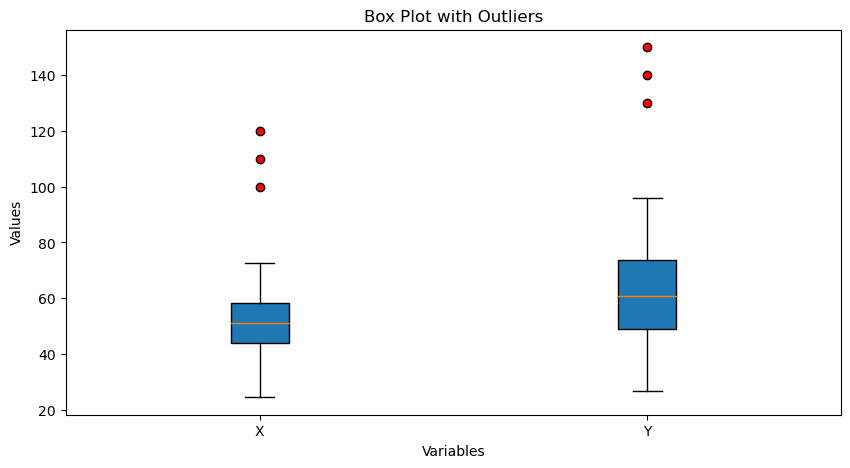

In [15]:
# Creating a box plot with outliers
plt.figure(figsize=(10, 5))

# Creating box plot
plt.boxplot([X, Y], vert=True, patch_artist=True, labels=['X', 'Y'], flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Box Plot with Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


#### Detection Based on Standard Deviation

- This method uses the variation of the variable around the mean and excludes values exceptionally far from this mean, within an interval defined by two thresholds centered around the mean.
- The thresholds are measured in terms of the number $\eta$ of standard deviations:

$[\mu - \eta\sigma, \mu + \eta\sigma]$

where $\mu$ is the mean, $\sigma$ is the standard deviation, and $\eta$ is the threshold.

- Disadvantage: The choice of $\eta$ is arbitrary.

Let's demonstrate this method.

In [13]:
# Detection of outliers based on standard deviation
threshold = 3
mean_X = np.mean(X)
std_X = np.std(X)

outliers = X[(X < mean_X - threshold * std_X) | (X > mean_X + threshold * std_X)]
print("Outliers detected based on standard deviation:\n", outliers)

Outliers detected based on standard deviation:
 [100. 110. 120.]
